# Do visualizations of Results
Cells are independent vizualiations of figures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os  # For Saving to Folder

import matplotlib.cm as cm
import matplotlib.colorbar as clb
from matplotlib import gridspec

# Plot Viterbi Paths

In [2]:
def load_data(folder="../Simulated/Example0/", empirical=False):
    """Load and return the Data from one Data Folder"""
    
    ref_states = np.loadtxt(folder + "refs.csv", dtype="int", delimiter=",")
    ob_stat = np.loadtxt(folder + "hap.csv", dtype="int", delimiter=",")
    viterbi_path = np.loadtxt(folder + "viterbi_path.csv", dtype="int", delimiter=",")
    posterior = np.loadtxt(folder + "posterior.csv", dtype="float", delimiter=",")
    
    if empirical==False:
        lats = np.loadtxt(folder + "lat.csv", dtype="int", delimiter=",")
    else:
        lats = 0

    print(f"Successfully loaded Data from: {folder}")
    return ref_states, ob_stat, lats, viterbi_path, posterior

In [55]:
def plot_viterbi(folder = "../Simulated/Test20r/", save=True, empirical=False):
    """Plot Viterbi Path of Haplotype copying"""
    ref_states, ob_stat, lats, viterbi_path, _ = load_data(folder=folder, empirical=empirical)


    ###########################
    ###########################

    fs = 16

    plt.figure(figsize=(12,4))
    gs = gridspec.GridSpec(2, 1, height_ratios=[10, 1])
    gs.update(hspace=0.3) # set the spacing between axes. 

    ax = plt.subplot(gs[0]) # The left subplot
    ax1 = plt.subplot(gs[1]) # The middle one

    ax.imshow(ref_states, cmap='Greys',  aspect='auto')
    if empirical == False:
        ax.plot(lats[0,:]-1.5, linewidth=2, color="yellow", label="Copying State") # Plot upper Boarder
        ax.plot(lats[0,:]-0.5, linewidth=2, color="yellow") # Plot lower boarder

        ax.plot(lats[1,:]-1.5, linewidth=2, color="red") # Plot upper Boarder
        ax.plot(lats[1,:]-0.5, linewidth=2, color="red") # Plot lower boarder

    ax.plot(viterbi_path-1.0, linewidth=4, color="blue", label="Viterbi Path")

    ax.set_ylabel("Ref. Hapotype",fontsize=fs)
    #ax.axhline(-.3)
    ax.set_xticks([])

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), fontsize=fs) # Do the Legend

    # Do the Reference SNP:
    ax1.imshow(ob_stat, cmap='Greys',  aspect='auto')
    ax1.set_xlabel("SNP", fontsize=fs)
    ax1.set_yticks([])
    ax1.set_ylabel("Copy")
    
    ax.plot(viterbi_path-1.0, linewidth=4, color="blue", label="Viterbi Path")
    
    
    if save==True:
        plt.savefig(folder + "viterbi_path.pdf", bbox_inches = 'tight', pad_inches = 0)
    plt.show()

Successfully loaded Data from: ../Empirical/Sard20_0-10kROH/


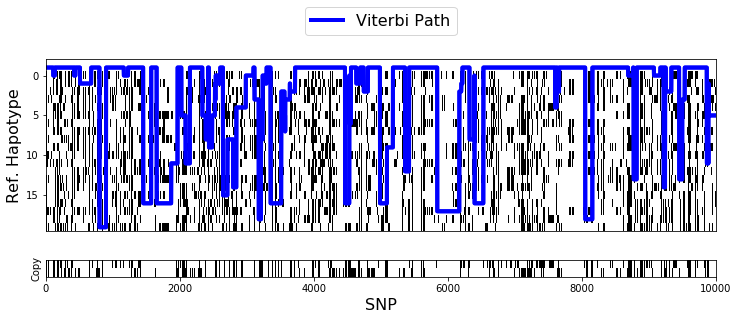

In [59]:
plot_viterbi(folder = "../Empirical/Sard20_0-10kROH/", empirical=True, save=False)

In [39]:
def plot_posterior(folder = "../Simulated/Test20r/", save=True, empirical=False):
    """Plot Viterbi Path of Haplotype copying.
    save: Whether to save the results.
    empirical: If true, do not load and plot latent states"""
    ref_states, ob_stat, lats, viterbi_path, posterior = load_data(folder, empirical)
    
    #if empirical == True:
    #    ref_states = np.array([ref_states[i,:] != ref_states[0,:] for i in range(len(ref_states))])  # Polarize Markers
        
    ###########################
    ###########################
    
    cmap = cm.get_cmap("viridis")
    norm = plt.Normalize(-8, 0)

    fs = 16

    plt.figure(figsize=(12,10))
    gs = gridspec.GridSpec(4, 1, height_ratios=[10, 1, 10, 1])
    gs.update(hspace=0.2) # set the spacing between axes. 

    ax = plt.subplot(gs[0]) # The left subplot
    ax1 = plt.subplot(gs[1]) # The middle one
    ax2 = plt.subplot(gs[2]) # The likelihood subplot
    ax3 = plt.subplot(gs[3])

    ax.imshow(ref_states, cmap='Greys',  aspect='auto')
    if empirical == False:
        ax.plot(lats[:] - 1.5, linewidth=1.5, color="yellow", label="Latent State1") # Plot upper Boarder
        ax.plot(lats[:] - 0.5, linewidth=1.5, color="yellow") # Plot lower boarder
        ax.plot(lats[:] - 1.5, linewidth=1.5, color="red", label="Latent State2") # Plot upper Boarder
        ax.plot(lats[:] - 0.5, linewidth=1.5, color="red") # Plot lower boarder

    ax.set_ylabel("Ref. Hapotype",fontsize=fs)
    #ax.axhline(-.3)
    ax.set_xticks([])

    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), fontsize=fs) # Do the Legend

    # Do the Reference SNP
    ax1.imshow(ob_stat, cmap='Greys',  aspect='auto')
    ax1.set_yticks([])
    ax1.set_ylabel("Copy")
    ax1.set_xlabel("SNP", fontsize=fs, labelpad=-10)
    
    # Do the Viridis CMAP:
    
    
    # Do the Posterior:
    ax2.imshow(posterior, aspect='auto', cmap=cmap, norm=norm)
    
    if empirical == False:
        ax2.plot(lats[:] - 0.5, linewidth=1.5, color="yellow", label="Latent State1") # Plot upper Boarder
        ax2.plot(lats[:] + 0.5, linewidth=1.5, color="yellow") # Plot lower boarder
        #ax2.plot(lats[1,:] - 0.5, linewidth=1.5, color="red", label="Latent State2") # Plot upper Boarder
        #ax2.plot(lats[1,:] + 0.5, linewidth=1.5, color="red") # Plot lower boarder
        #ax2.plot(viterbi_path-1.0, linewidth=4, color="blue", label="Viterbi Path")x2.plot(viterbi_path-1.0, linewidth=4, color="blue", label="Viterbi Path")
        ax2.set_ylabel("Posterior of States", fontsize=fs)
    
    ### Color Map
    cb1 = clb.ColorbarBase(ax3, cmap=cmap,
                            norm=norm,   # For the /1e3 format
                            orientation='horizontal')
    
    ax3.set_xlabel("Log Likelihood", fontsize=fs)
    #cb1.ax.tick_params(axis='y', direction='in')
    #cb1.ax.yaxis.tick_left()
    
    
    if save==True:
        plt.savefig(folder + "posterior.pdf", bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    
    
    ###########################################
    ### Plot the Posterior for State 0
    
    plt.figure(figsize=(12,4))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 10])
    gs.update(hspace=0.1) # set the spacing between axes. 

    ax = plt.subplot(gs[0]) # The left subplot
    ax1 = plt.subplot(gs[1]) # The middle one
    
    #print(lats==0)
    #ax.imshow([lats[0,:]==lats[1,:]],  cmap='Greys_r',  aspect='auto')
    homo = (ob_stat[0,:]==ob_stat[1,:])
    ax.imshow([homo, homo], cmap='Greys_r',  aspect='auto')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Homozygosity", fontsize=fs)
    
    ax1.plot(np.exp(posterior[0,:]), linewidth=4, color="maroon", label="State 0")
    #ax1.legend(fontsize=fs, loc="lower center")
    ax1.set_xlim(0, np.shape(posterior)[1])
    ax1.set_ylabel("Posterior Probability", fontsize=fs)
    ax1.set_xlabel("SNP", fontsize=fs)
    
    if save==True:
        plt.savefig(folder + "posterior_HW.pdf", bbox_inches = 'tight', pad_inches = 0)
    
    plt.show()

Successfully loaded Data from: ../Empirical/Sard100_0-10kROH2/


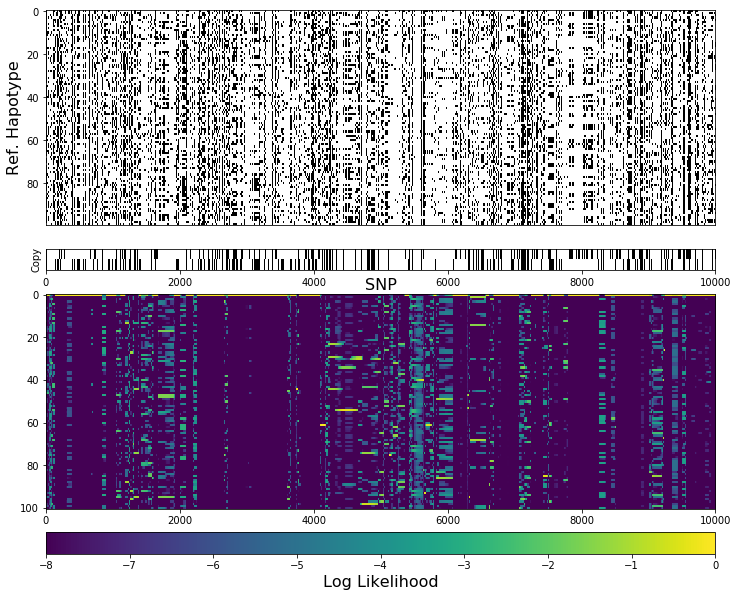

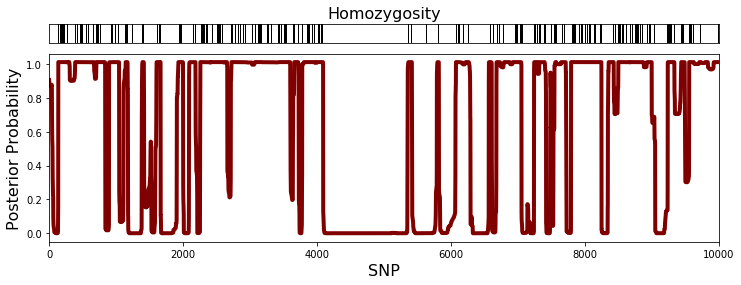

In [50]:
#plot_posterior(folder = "../Simulated/Test2r/", save=True)
plot_posterior(folder = "../Empirical/Sard100_0-10kROH2/", save=False, empirical=True)

# Do the Empirical Plot (with Linkage Maps)

In [58]:
def plot_posterior_cm(folder = "../Simulated/Test20r/", save=False, empirical=True):
    """Plot Viterbi Path of Haplotype copying.
    save: Whether to save the results.
    empirical: If true, do not load and plot latent states"""
    cmap = cm.get_cmap("viridis")
    norm = plt.Normalize(-8, 0)

    fs = 16
    
    ref_states, ob_stat, lats, viterbi_path, posterior = load_data(folder, empirical)
    
    gmap = np.loadtxt(folder + "map.csv", dtype="float", delimiter=",")
    assert(len(gmap)==np.shape(ob_stat)[1])
        
    ###########################
    ###########################
    
    plt.figure(figsize=(14,4))
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 8])
    gs.update(hspace=0.3) # set the spacing between axes. 

    ax = plt.subplot(gs[0]) # The upper subplot
    ax1 = plt.subplot(gs[1]) # The lower subplot
    

    het = (ob_stat[0,:]!=ob_stat[1,:])
    
    ax.plot(gmap*100, het, "bo", ms=2, alpha=0.3)
    ax.set_ylabel("Het", fontsize=fs)
    
    #ax.set_title("Hetorzygosity", fontsize=fs)
    
    ax1.plot(gmap*100, np.exp(posterior[0,:]), linewidth=2, color="maroon", label="State 0")
    ax1.plot(gmap*100, het, "bo", ms=2, alpha=0.3)
    #ax1.legend(fontsize=fs, loc="lower center")
    #ax1.set_xlim(0, np.shape(posterior)[1])
    ax1.set_ylabel("Post. Probability", fontsize=fs)
    ax1.set_xlabel("SNP", fontsize=fs)
    ax1.set_xlabel("CentiMorgan")
    
    if save==True:
        plt.savefig(folder + "posterior_cm.pdf", bbox_inches = 'tight', pad_inches = 0)
    
    plt.show()

Successfully loaded Data from: ../Empirical/Sard100_0-10kROH2/


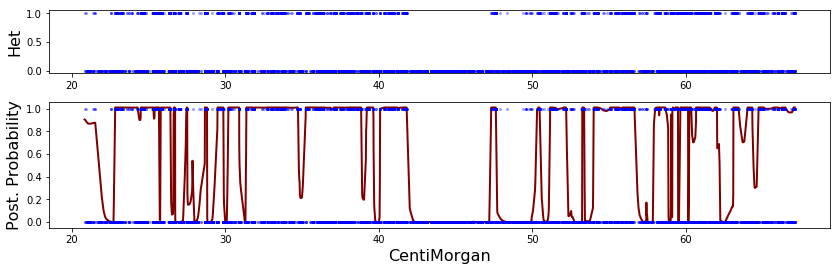

In [59]:
plot_posterior_cm(folder = "../Empirical/Sard100_0-10kROH2/", save=False, empirical=True)

# Area 51